https://www.irit.fr/~Dominique.Longin/wp-content/uploads/sites/11/2019/11/coursIFI2016-02-LogiqueFloue.pdf

In [1]:
import numpy as np
import skfuzzy as fuzz
from matplotlib import pyplot as plt

In [31]:
#returns the set of intersecting points
def intersect_project(s,v):
    return np.argwhere(np.diff(np.sign(s - v))).flatten()[-1]

* X axis

In [2]:
start = 0
stop = 10 + 0.001
step = 0.25
x = np.arange(start, stop, step)
print(x)
print(len(x))

[ 0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75
  3.    3.25  3.5   3.75  4.    4.25  4.5   4.75  5.    5.25  5.5   5.75
  6.    6.25  6.5   6.75  7.    7.25  7.5   7.75  8.    8.25  8.5   8.75
  9.    9.25  9.5   9.75 10.  ]
41


In [3]:
fig_scale = 3
plt.figure(figsize=(6.4 * fig_scale*20,4.8*fig_scale))

<Figure size 27648x1036.8 with 0 Axes>

<Figure size 27648x1036.8 with 0 Axes>

# 1. Fuzzification

## 1.1 Règles

* **R1 : (Service mauvais) | (nourriture mauvaise) => Pourboire faible**
* **R2 : (Service bon) => (Pourboire moyen)**
* **R3 : (Service excellent) | (nourriture délicieuse) => Pourboire élevé**

## 1.2 Représentation graphique

### Variable Service

In [4]:
# Membership function for  Service
s_mauvais = fuzz.trapmf(x,[0,0,2,4])
s_bon = fuzz.trapmf(x,[3,5,6,8])
s_excellent = fuzz.trapmf(x,[7,9,10,10])

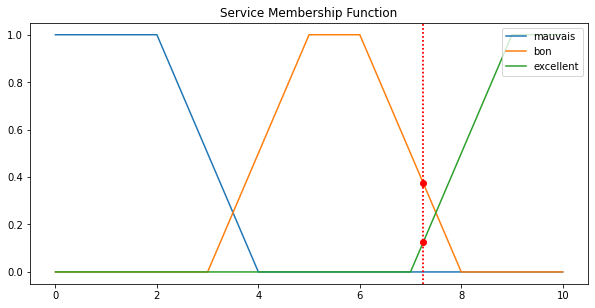

In [46]:
plt.figure(figsize=(10,4.8))
plt.title("Service Membership Function")
plt.plot(x, s_mauvais, label="mauvais")
plt.plot(x, s_bon, label="bon")
plt.plot(x, s_excellent, label="excellent")
plt.legend(loc="upper right")

#intersection of choosen values
v = 7.25

## s_bon function
idx1 = intersect_project(x,v)
plt.plot(x[idx1], s_bon[idx1], 'ro')
plt.axvline(x=v, linestyle=':', color='red')

## s_excellent function
idx2 = intersect_project(x,v)
plt.plot(x[idx2], s_excellent[idx2], 'ro')
plt.axvline(x=v, linestyle=':', color='red')

### Variable Nourriture

In [6]:
# Membership function for Nourriture
n_mauvais = fuzz.trapmf(x,[0,0,4,6])
n_delicieux = fuzz.trapmf(x,[5,7,10,10])

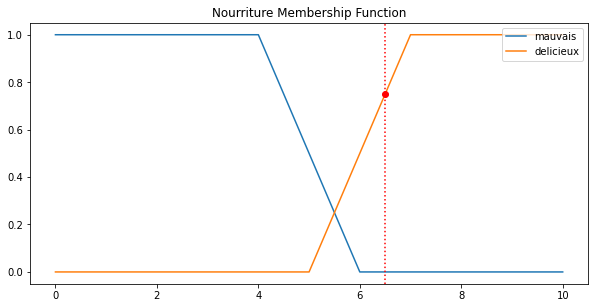

In [47]:
plt.figure(figsize=(10,4.8))
plt.title("Nourriture Membership Function")
plt.plot(x, n_mauvais, label="mauvais")
plt.plot(x, n_delicieux, label="delicieux")

plt.legend(loc="upper right")

#intersection of choosen values
v = 6.5

## s_bon function
idx1 = intersect_project(x,v)
plt.plot(x[idx1], n_delicieux[idx1], 'ro')
plt.axvline(x=v, linestyle=':', color='red')



### Variable Pourboire

In [8]:
# Membership function for  Service
p_faible = fuzz.trapmf(x,[0,0,2,4])
p_moyen = fuzz.trapmf(x,[3,5,6,8])
p_eleve = fuzz.trapmf(x,[7,9,10,10])

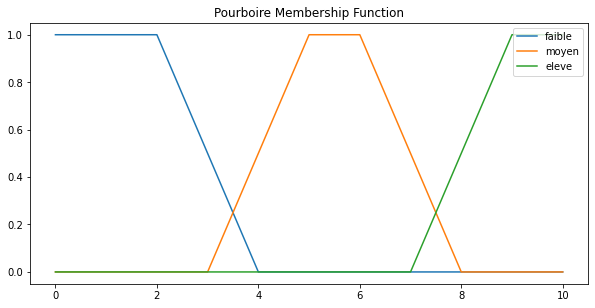

In [9]:
plt.figure(figsize=(10,4.8))
plt.title("Pourboire Membership Function")
plt.plot(x, p_faible, label="faible")
plt.plot(x, p_moyen, label="moyen")
plt.plot(x, p_eleve, label="eleve")
plt.legend(loc="upper right")

# 2. Degree of membership - degré d'activation

Using the rules we compute the membership functions with the values to find **degree of membership** using the value chosen :
* Service = 7.25
* nourriture = 6.5

R1 : <h3>$\mu_1(x,y) = max(\mu_{serviceMauvais}(x),\mu_{nourritureMauvaise}(y))$</h3>

R2 : <h3>$\mu_2(x) = \mu_{serviceBon}(x)$</h3>

R3 :  <h3>$\mu_3(x,y) = max(\mu_{serviceExcellent}(x),\mu_{nourritureDelicieuse}(y))$</h3>

* Degree of membership of the inputs

 <h3>$\mu_1(7.25,6.5) = max(\mu_{serviceMauvais}(7.25),\mu_{nourritureMauvaise}(6.5)) = max(0,0) =0$</h3>
 <h3>$\mu_2(7.25) = \mu_{serviceBon}(7.25) = 0.4$</h3>
 <h3>$\mu_3(7.25,6.5) = max(\mu_{serviceExcellent}(7.25),\mu_{nourritureDelicieuse}(6.5)) = max(0.16,0.76)$</h3>

## Annexe : Intersection of membership function with poin projection

In [26]:
v = 3
xf = np.argwhere(np.diff(np.sign(x - v))).flatten()[-1]
xf

12

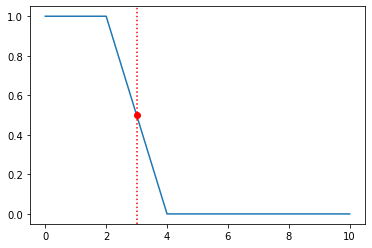

In [28]:
plt.plot(x, p_faible, label="faible")
plt.plot(x[xf], p_faible[xf], 'ro')
plt.axvline(x=v, linestyle=':', color='red')


In [34]:
xf = intersect_project(x,3)
xf

12